<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/ESAA_HW_3_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [9. 비지도 학습]
군집, 이상치 탐지, 밀도 추정

### 9.1 군집
비슷한 샘플을 구별해 하나의 클러스터로 할당
* 고객 분류(추천 시스템), 데이터 분석, 차원 축소 기법, 이상치 탐지, 준지도 학습, 검색 엔진, 이미지 분할 등

#### 9.1.1 k-평균
* 로이드-포지 알고리즘이라고도 부름

In [12]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# 추가 코드 - make_blobs()의 정확한 인수는 중요하지 않습니다.
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

* 군집에서 각 샘플의 레이블은 알고리즘이 샘플에 할당한 클러스터의 인덱스
* labels_ 인스턴스 변수에 훈련된 샘플의 레이블 가지고 있음

In [13]:
print(y_pred)
y_pred is kmeans.labels_

[4 0 1 ... 2 1 0]


True

* 이 알고리즘이 찾은 센트로이드 다섯 개도 확인 가능

In [14]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

* 새로운 샘플에 가장 가까운 센트로이드의 클러스터 할당 가능

In [15]:
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

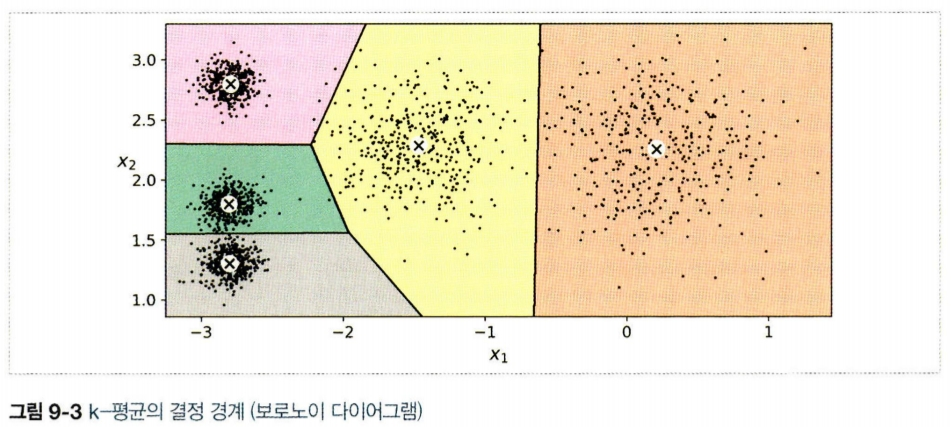

* 클러스터의 결정 경계를 그려보면 보로노이 다이어그램 얻을 수 있음, 센트로이드가 x로 표시됨
* 대부분 잘 할당되었으나 몇 개는 레이블이 잘못 부여됨 (특히 왼쪽 위와 가운데 클러스터의 경계 부근)  
* 하드 군집이라는 샘플을 하나의 클러스터에 할당하는 것보다 클러스터마다 샘플에 점수를 부여하는 소프트 군집이 유용할 수 있음


In [16]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

**k-평균 알고리즘**
* 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 것을 센트로이드에 변화가 없을 때(수렴)까지 계속 반복
* 적절한 솔루션으로 수렴하지 못할 수 있는데 이는 센트로이드 초기화에 달려 있음
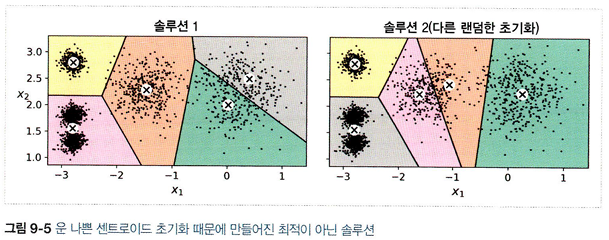

**센트로이드 초기화 방법**
* 센트로이드 위치를 근사하게 알 수 있다면 init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init를 1로 설정할 수 있음

In [17]:
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

* 또 다른 방법은 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택
* 랜덤 초기화 횟수는 n_init 매개변수로 조절 (default는 10)
* 이너셔 : 최적의 솔루션 정하는 성능 지표

In [18]:
kmeans.fit_predict(X)           # fit 해줘야 inertia_ 가능
kmeans.inertia_

211.5985372581684

* score() 메서드는 이너셔의 음숫값

In [19]:
kmeans.score(X)

-211.59853725816836

* k-평균++ 알고리즘 초기화 방법이 default



**k-평균 속도 개선과 미니배치 k-평균**
* 불필요한 거리 계산을 피함으로서 알고리즘 속도 향상
* But 일반적으로 이니셔는 조금 더 나쁨

In [20]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

**최적의 클러스터 개수 찾기**
* 실루엣 점수, 즉 모든 샘플에 대한 실루엣 계수의 평균으로 최적의 클러스터 개수 선택

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

* 실루엣 다이어그램  
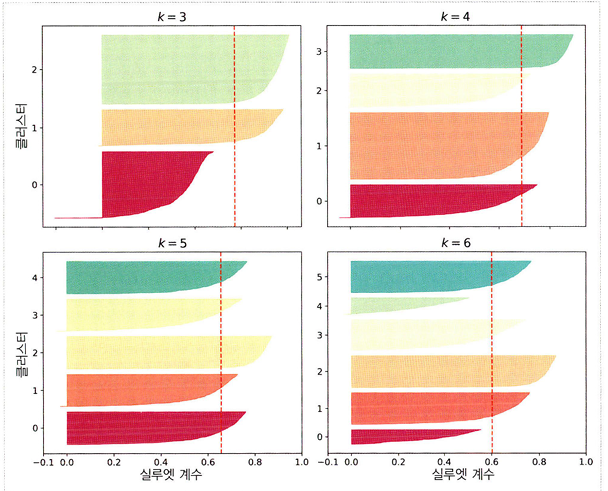



#### 9.1.2 k-평균의 한계
클러스터 개수를 지정해야 함, 클러스터의 밀집도가 서로 다르거나 원형이 아닐경우 잘 작동하지 않음

#### 9.1.3 군집을 사용한 이미지 분할
이미지를 세그먼트 여러 개로 분할하는 작업  
시맨틱 분할 : 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당  
색상 분할 : 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당

In [26]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

image = plt.imread('/content/gdrive/MyDrive/ESAA/data/ladybug.png')
image.shape

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(533, 800, 3)

* (높이,너비,컬러채널 개수)
* 투명도를 위해 알파 채널을 가지면 더 많은 채널을 가짐

In [ ]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

* 한 색깔을 하나의 컬러 클러스터로 만들고 평균 컬러를 찾고, 긴 색상의 리스트를 원본 이미지와 동일한 크기로 바꿈
* 그럼 아래 그림 중 8색상과 같은 이미지를 출력함

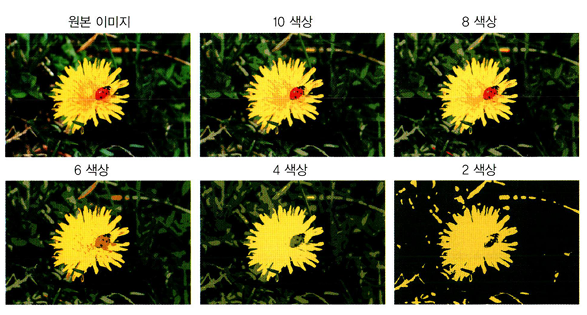

#### 9.1.4 군집을 사용한 전처리
차원 축소에 효과적인 방법

In [28]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [32]:
log_reg.score(X_test, y_test)

0.9644444444444444

* k-평균을 전처리 단계로 사용해 더 좋아지는지 확인
* 파이프라인을 만들어 훈련 세트를 50개의 클러스터로 모으고 이미지를 50개의 클러스터까지 거리로 바꿈

In [34]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [35]:
pipeline.score(X_test, y_test)

0.96

* 가장 좋은 k 값 찾아서 다시 하기

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   3.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.7s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.3s
[CV] END ...............................kmeans__n_clusters=5; total time=   2.6s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [37]:
grid_clf.best_params_, grid_clf.score(X_test, y_test)

({'kmeans__n_clusters': 94}, 0.9688888888888889)

k=94개의 클러스터를 사용할 때 정확도가 크게 향상됨

#### 9.1.5 군집을 사용한 준지도 학습
레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용

In [38]:
n_labeled=50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [39]:
log_reg.score(X_test, y_test)

0.8488888888888889

* 스코어 낮으므로 대표 이미지 (각 클러스터에서 센트로이드에 가장 가까운 이미지) 찾기

In [40]:
k=50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

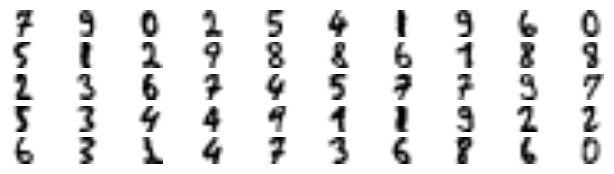

In [45]:
plt.figure(figsize=(8, 2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

* 수동으로 레이블 할당

In [46]:
y_representative_digits = np.array([7,9,0,2,5,4,1,9,6,0,
                                    5,1,2,9,8,8,6,1,8,8,
                                    2,3,6,7,4,5,7,7,9,7,
                                    5,3,4,4,9,1,1,9,2,2,
                                    6,3,2,4,7,3,6,8,6,0])

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9

* 스코어 상승
* 이 레이블을 동일한 클러스터에 있는 모든 샘플로 전파 (레이블 전파)

In [48]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8977777777777778

* 센트로이드와 가까운 샘플의 20%에만 레이블 전파해보기

In [52]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_==i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

paratially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[paratially_propagated]
y_train_partially_propagated = y_train_propagated[paratially_propagated]

In [53]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9177777777777778

* 성능 향상됨, 전파된 레이블이 실제로 매우 좋기 때문

In [58]:
# np.mean(y_train_partially_propagated == y_train[partially_propagated])

#### 9.1.6 DBSCAN
모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능 냄

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [60]:
dbscan.labels_

array([ 0,  1,  2,  3,  6,  0,  4, -1,  0,  0,  5,  4,  5, -1,  4,  5,  5,
        3,  3,  0,  2,  6,  3,  5,  0,  3,  0,  6,  1,  5,  2,  5,  6,  0,
       -1,  4,  0,  5,  0,  5,  5,  3,  6,  5,  5,  0,  6,  6, -1,  1,  5,
        2,  1,  3,  6,  4, -1,  0,  2,  0, -1,  5,  5,  6,  4,  5, -1, -1,
        0,  5,  0,  6,  5,  1,  6,  0, -1,  5, -1,  6,  6, -1,  2,  4,  2,
        0,  3,  5,  4,  5,  1,  5,  0,  2,  2,  2,  6,  0,  4,  5,  6,  4,
        5,  3,  5,  2, -1,  0,  5,  0,  6,  0,  5,  0,  3,  0,  0,  5,  3,
        5,  1,  1, -1,  2,  4,  2,  4,  1,  5,  4,  4,  5,  3,  5,  7,  0,
        0,  4,  2,  4,  2,  6,  5,  4,  5,  2,  3,  3,  4, -1,  0,  2,  6,
        5,  5,  4,  2,  4,  0,  0,  3,  2,  3,  0,  3,  5,  5, -1,  3,  4,
        2,  2,  1,  4,  2,  6,  2,  0,  0, -1,  5,  5,  2,  6,  0,  6,  2,
        2,  3,  2,  0,  0,  4,  2,  0,  1,  5,  5,  6,  5,  2,  5,  6,  0,
        5, -1,  0,  0,  5,  5,  5,  2, -1,  3,  5,  0,  0, -1,  3,  4,  4,
        4,  2,  5,  6,  4

* -1은 이상치로 판단한 것
* 핵심 샘플의 인덱스는 core_sample_indices_에 저장됨, 핵심 샘플 자체는 components_에 저장

In [61]:
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_)
dbscan.components_

816
[  0   1   2   3   5   6   8   9  10  11  12  14  15  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40
  41  42  43  44  46  47  49  50  51  52  54  55  57  58  59  61  62  63
  64  65  68  70  71  72  73  74  75  77  79  80  82  83  84  87  88  90
  91  92  93  94  95  96  97  98  99 100 101 103 104 105 107 108 109 110
 111 112 113 114 115 117 118 119 120 121 123 124 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 148 150 151 152 153
 154 155 156 157 158 159 160 162 163 164 165 166 168 169 170 171 172 173
 174 175 176 177 178 180 181 182 183 184 186 187 188 189 190 191 192 193
 194 196 197 198 199 200 201 203 204 206 207 208 209 210 211 213 214 215
 216 218 219 220 222 223 224 225 226 227 228 229 231 233 234 235 236 237
 238 239 240 242 243 245 246 247 248 249 250 251 252 253 255 256 259 260
 261 262 263 264 266 267 269 270 271 272 273 274 276 278 279 280 281 284
 285 287 289 290 291 292 293 294 295 298 299 30

array([[-0.12509926,  0.94125588],
       [ 1.93875542,  0.09103998],
       [ 0.43155956, -0.32240957],
       ...,
       [ 0.37110344,  0.96877868],
       [ 0.40620961, -0.33603309],
       [-0.76699327,  0.56713714]])

* 군집 결과는 아래와 같음, 오른쪽 eps를 0.2로 줄이면 완벽한 군집을 얻음

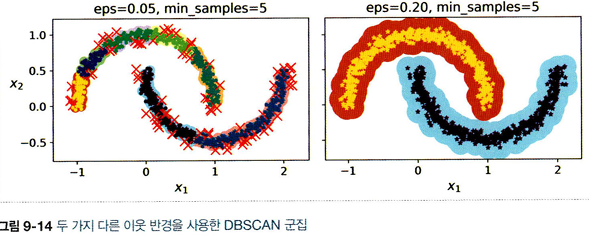

* DBSCAN 클래스는 predict() 메서드가 아닌 fit_predict() 메서드 제공함

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [65]:
X_new = np.array([[-0.5,0], [0,0.5], [1,-0.1], [2,1]])
print(knn.predict(X_new))
knn.predict_proba(X_new)

[3 2 5 1]


array([[0.  , 0.  , 0.12, 0.88, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.22, 0.62, 0.04, 0.12],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

* kneighbors()는 가장 가까운 k개 이웃의 거리와 인덱스를 반환

In [67]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2] = -1
y_pred.ravel()

array([-1,  2,  7, -1])

* 클러스터의 모양과 개수에 상관 없이 감지할 수 있고 이상치에 안정적이며 하이퍼파라미터가 2개뿐임, 하지만 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능함

#### 9.1.7 다른 군집 알고리즘
병합 군집, BIRCH, 평균-이동, 유사도 전파, 스펙트럼 군집 등

### 9.2 가우시안 혼합
가우시안 혼합 모델 GMM은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델  

In [68]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [69]:
print(gm.weights_)
print(gm.means_)
gm.covariances_

[0.59778704 0.2010298  0.20118316]
[[ 0.4992668   0.24974848]
 [ 1.75621653 -0.05466728]
 [-0.74817912  0.55235147]]


array([[[ 0.17502866, -0.10858382],
        [-0.10858382,  0.29204265]],

       [[ 0.05049325,  0.06069017],
        [ 0.06069017,  0.08852669]],

       [[ 0.05114976,  0.06087663],
        [ 0.06087663,  0.08631683]]])

* 기댓값-최대화(EM) 알고리즘 : 샘플을 클러스터에 할당하는 기댓값 단계, 클러스터를 업데이트하는 최대화 단계 반복

In [70]:
gm.converged_, gm.n_iter_

(True, 16)

In [71]:
print(gm.predict(X))
print(gm.predict_proba(X))

[0 1 0 2 1 2 0 1 0 2 0 0 0 0 0 0 0 2 2 0 0 1 2 0 0 2 0 1 1 0 0 0 1 0 1 0 2
 0 2 0 0 2 1 0 0 2 1 1 2 1 0 0 1 2 1 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 1 0 1
 1 2 0 0 0 1 1 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 2 0 0 1 2 0 2 0
 0 0 0 2 0 2 0 2 0 1 1 2 0 0 0 0 1 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 2 2
 0 1 0 0 1 0 0 0 0 0 2 2 2 0 2 0 2 0 0 0 2 0 0 0 1 0 0 1 0 0 2 0 0 0 0 1 0
 1 0 0 2 0 0 0 0 0 2 1 0 0 1 0 0 0 1 2 0 2 2 0 0 0 0 0 0 2 0 0 2 1 2 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 2 0 1 1 0 1 0 2 0 0 2 0 2 1 0 0 0 0 0 1
 0 0 2 2 0 1 0 2 2 0 2 0 0 1 2 0 1 1 2 0 0 0 0 2 1 2 1 1 0 1 0 0 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 1 2 0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 2 0 2 0 0 1 0 2 1 0
 0 0 2 0 0 2 0 0 0 0 1 0 0 0 0 0 2 2 0 0 2 1 0 0 1 0 0 1 1 2 0 1 1 1 2 1 0
 2 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 1 2 0 0 2 0
 2 0 2 2 1 1 0 0 0 0 0 2 0 0 0 2 0 1 0 0 2 0 1 0 1 2 0 0 1 1 0 1 0 0 0 0 0
 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 2 0 1 0 0 0 2 2 2 0 2 0 0 2 2 0 1 0 0 1 0 1
 1 0 0 2 1 0 2 0 2 0 0 0 

* 가우시안 혼합 모델은 생성 모델이므로 이 모델에서 새로운 샘플을 만들 수 있음

In [72]:
X_new, y_new = gm.sample(6)
print(X_new)
y_new

[[ 0.57461223 -0.19025198]
 [ 1.05655467 -0.168917  ]
 [ 0.44208415  1.23562624]
 [ 0.59064915  0.44767107]
 [ 0.35950878  0.44111467]
 [-1.07004864  0.11713335]]


array([0, 0, 0, 0, 0, 2])

* 주어진 위치에서 모델의 밀도를 추정할 수 있음, score_samples() 메서드는 그 위치의 PDF의 로그를 예측함

In [73]:
gm.score_samples(X)

array([-2.05159275e+00, -3.72022466e-01, -1.58695727e+00, -3.38107705e+00,
       -9.89537925e-01, -2.54428029e-01, -1.88544493e+00, -1.83284651e+00,
       -2.02786895e+00, -1.20244550e+00, -1.49777243e+00, -2.17802696e+00,
       -1.50583324e+00, -1.92983496e+00, -1.59764076e+00, -1.75578052e+00,
       -1.82410658e+00, -5.99772420e-01, -6.84189046e-01, -2.21727507e+00,
       -1.57561906e+00, -4.91296233e-01, -1.55543600e+00, -1.36792370e+00,
       -2.19014653e+00, -3.15885760e+00, -1.98926666e+00, -1.46758209e-01,
       -1.01935772e+00, -1.36483186e+00, -1.57181099e+00, -1.78826661e+00,
       -4.06314448e-01, -2.08471535e+00, -8.42588446e-01, -1.56460876e+00,
       -7.59621823e-01, -1.45822325e+00,  1.67562410e-01, -1.45557615e+00,
       -1.62424248e+00, -2.63666600e-01,  8.76697397e-02, -1.69499927e+00,
       -1.42061914e+00, -7.82294043e-01, -5.49846490e-01, -7.68258586e-01,
       -3.52555668e+00, -9.98029425e-01, -1.39355371e+00, -1.73447305e+00,
       -1.39969823e+00, -

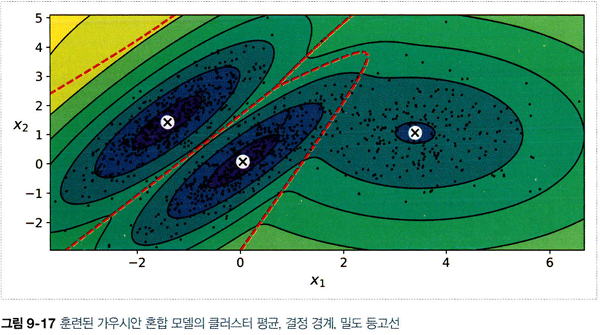

* 클러스터가 많거나 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어려움
* 이를 위해 클러스터의 모양과 방향의 범위를 제한하는 공분산 행렬에 제약 추가하는 방법 사용 가능함
* covariance_type 매개변수를 spherical, diag, tied 중 하나로 설정 (기본 값은 full)  
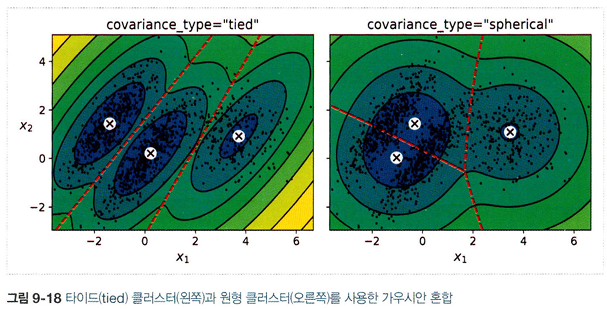

#### 9.2.1 가우시안 혼합을 사용한 이상치 탐지

In [74]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,4)
anomalies = X[densities < density_threshold]

* 이상치가 별모양으로 표시됨  
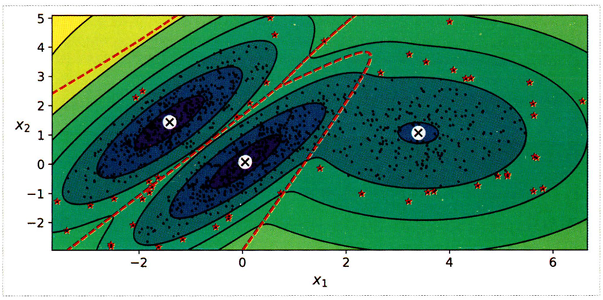

#### 9.2.2 클러스터 개수 선택하기
가우시안 혼합에서는 이너셔나 실루엣 점수가 아닌 BIS, AIC와 같은 이론적 정보 기준을 최소화하는 모델을 찾음

In [75]:
gm.bic(X), gm.aic(X)

(2745.621873926699, 2662.190034184003)

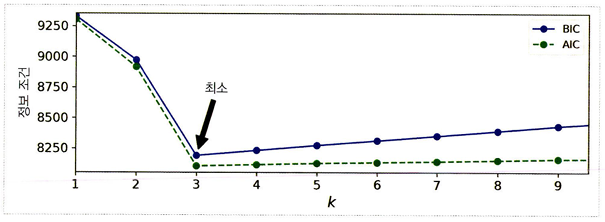

#### 9.2.3 베이즈 가우시안 혼합 모델
최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 클래스를 사용할 수 있음  
* n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정하면 자동으로 불필요한 클러스터를 제거함

In [76]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.13, 0.11, 0.13, 0.16, 0.11, 0.13, 0.14, 0.1 , 0.  , 0.  ])

* 알고리즘이 자동으로 8개의 클러스터가 필요하다는 것을 감지했음

#### 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘
PCA, Fast-MCD, 아이솔레이션 포레스트, LOF, one-class SVM 등